In [1]:
# Programa de Machining Learning de Classificação usando KNN (K Nearest Neighbor)

In [2]:
# importando bibliotecas:
import numpy as np                 #Biblioteca para realização de operações em conjuntos de dados
import pandas as pd                #Biblioteca de análise e manipulação da dados
import sklearn as sk               #Biblioteca para Manchine Learn (ML)
import seaborn as sns
from flask import Flask, request, render_template, make_response
import os

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix # Métrica para verificar o modelo
from sklearn.metrics import precision_score, recall_score     # mais métricas precision para verificação do modelo
import matplotlib.pyplot as plt               #Biblioteca para criação de gráficos e visualizações de dados em geral (usado aqui para ver a curva ROC)
from IPython.display import Image

In [3]:
#importando o arquivo de dados
df = pd.read_csv("C:/df/Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [4]:
#Verificando se existem celulas vazias
print(df.isna().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [5]:
df.shape

(569, 6)

In [6]:
#separando as variáveis entre preditoras e alvo
y = df['diagnosis']                            # y receberá a coluna classe
x = df.drop('diagnosis',axis = 1 )         # x receberá todas as colunas menos classe

In [7]:
#Balanceando os dados

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
x, y = tl.fit_resample(x, y)

x.shape, y.shape

((549, 5), (549,))

In [8]:
#separação de conjunto de dados para treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.3)   #separando 30% dos dados para teste

In [9]:
#usando o classificador KNN (k nearest neighbor)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 35)           #usando os 5 pontos mais próximos para classificação

#treinando o modelo
clf.fit(x_treino,y_treino)



KNeighborsClassifier(n_neighbors=35)

In [10]:
#previsão para os dados de teste
y_predict = clf.predict(x_teste)

#gerando as probabilidades
predict_prob=clf.predict_proba(x_teste)

In [11]:
#atribuindo valores às variáveis
frp,tpr,thresch=roc_curve(y_teste,predict_prob[:,1],pos_label=1)

In [12]:
#realizando o looping das probabilidades
random_probes=[0 for i in range (len(y_teste))]
p_frp,p_tpr,_=roc_curve(y_teste,random_probes,pos_label=1)

Text(0, 0.5, 'TPR - Positivo verdadeiro (razão)')

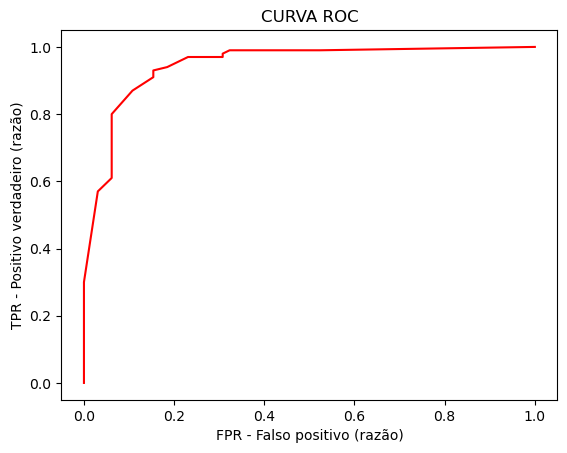

In [13]:
#Criando o gráfico
plt.plot(frp,tpr,linestyle = '-', color = 'red', label = 'Gradient Boosting')

plt.title('CURVA ROC')
plt.xlabel('FPR - Falso positivo (razão)')
plt.ylabel('TPR - Positivo verdadeiro (razão)')  

In [14]:
#Área sub a curva (Area Under Curve - AUC)
print('AUC SCORE: ', roc_auc_score(y_teste,predict_prob[:,1]))

AUC SCORE:  0.9463076923076923


In [15]:
# verificando a matriz de confusão
print(confusion_matrix(y_teste, y_predict))


[[50 15]
 [ 3 97]]


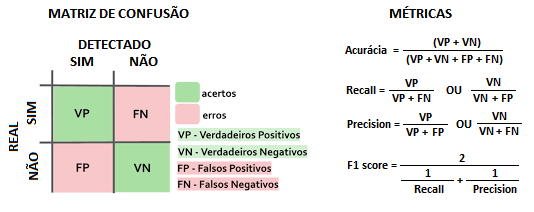

In [16]:
Image('C:/df/Matriz de confusão.png')

In [17]:
#Observando as principais métricas para o modelo:
print(classification_report(y_teste, y_predict, digits=6))

              precision    recall  f1-score   support

           0   0.943396  0.769231  0.847458        65
           1   0.866071  0.970000  0.915094       100

    accuracy                       0.890909       165
   macro avg   0.904734  0.869615  0.881276       165
weighted avg   0.896533  0.890909  0.888450       165



In [18]:
print(classification_report(y_teste, y_predict,target_names=['falso', 'positivo'], digits=6 ))

              precision    recall  f1-score   support

       falso   0.943396  0.769231  0.847458        65
    positivo   0.866071  0.970000  0.915094       100

    accuracy                       0.890909       165
   macro avg   0.904734  0.869615  0.881276       165
weighted avg   0.896533  0.890909  0.888450       165



In [19]:
accuracy_score(y_teste, y_predict)  

0.8909090909090909

In [20]:
print(recall_score(y_teste, y_predict,average=None))

[0.76923077 0.97      ]


In [21]:
print(precision_score(y_teste, y_predict,average=None))

[0.94339623 0.86607143]


In [22]:
f1_score(y_teste, y_predict) 

0.9150943396226415

In [23]:
#criando o modelo
import joblib
joblib.dump(clf,'model_KNN.pkl')

['model_KNN.pkl']

In [24]:
model = joblib.load('model_KNN.pkl')

In [25]:
print("Atributos do modelo:\n\nClasses:{}\n\nEstimators:{}\n\nParametros:{}".format(model.classes_,model.n_estimators,model.base_estimator)

SyntaxError: incomplete input (2433145301.py, line 1)

In [ ]:
#criando um valor para teste do modelo
teste =np.array([[14.54,27.54,96.73,658.8,0.11390]])

In [ ]:
#print(x_treino.head)

In [ ]:
#testando um valor para o modelo
model.predict(teste)

In [ ]:
#verificando a probabilidade para cada uma das classes
model.predict_proba(teste)

In [ ]:
#Colocando em produção o modelo treinado

In [ ]:
app = Flask(__name__, static_url_path='/static')

In [ ]:
# Carregar o modelo (já foi carregado antes
#model = joblib.load('model_KNN.pkl')

In [ ]:
@app.route('/')
def display_gui():
    return render_template('template.html')
@app.route('/verificar',methods=['POST'])
def verificar():
    raio = request.form['mean_radius']
    textura = request.form['mean_texture']
    perímetro = request.form['mean_perimeter']
    area = request.form['mean_area']
    suavidade = request.form['mean_smoothness']
    teste = np.array([[raio,textura,perímetro,area,suavidade]])

    print(":::::: Dados de Teste ::::::")
    print("raio: {}".format(raio))
    print("textura: {}".format(textura))
    print("perímetro: {}".format(perímetro))
    print("area: {}".format(area))
    print("suavidade: {}".format(suavidade))
    print("\n")

    classe = model.predict(teste)[0]
    print("Classe Predita: {}".format(str(classe)))

    return render_template('template.html',classe=str(classe))

if __name__ == "__main__":
    port = int(os.environ.get('PORT', 5500))
    app.run(host='0.0.0.0',port=port)
    


In [ ]:
#Para poder rodar o programa como .py colocaremos o código no VS (Visual Studio Code)
